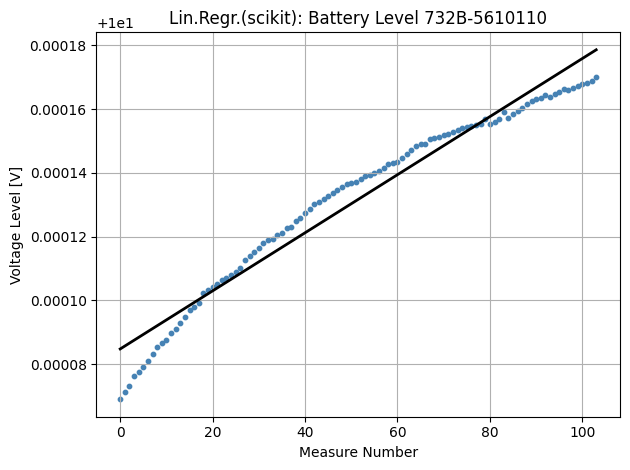

Slope: 0.00000091
Intercept: 10.00008480 V

Predicted Measure Number = 104, prediction is 10.00017949 V
Predicted Measure Number = 105, prediction is 10.00018040 V
Predicted Measure Number = 106, prediction is 10.00018131 V
Predicted Measure Number = 107, prediction is 10.00018222 V
Predicted Measure Number = 108, prediction is 10.00018313 V
Predicted Measure Number = 109, prediction is 10.00018404 V
Predicted Measure Number = 110, prediction is 10.00018496 V
Predicted Measure Number = 111, prediction is 10.00018587 V
Predicted Measure Number = 112, prediction is 10.00018678 V
Predicted Measure Number = 113, prediction is 10.00018769 V
Predicted Measure Number = 114, prediction is 10.00018860 V
Predicted Measure Number = 115, prediction is 10.00018951 V

Median Absolute Deviation: 0.00002367 V

MSE test: 0.000000000033e0
MAE test: 0.000004904269e0
R^2 test: 0.958



In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy import io

# load the dataset
data = np.loadtxt('110data2.csv', usecols=[1], delimiter=',')
X = np.arange(len(data))
y = data
#print(data)

slr = LinearRegression()
X = X.reshape(-1,1)
slr.fit(X, y)
y_pred = slr.predict(X)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', s=10)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

lin_regplot(X, y, slr)
plt.title('Lin.Regr.(scikit): Battery Level 732B-5610110')
plt.ylabel('Voltage Level [V]')
plt.xlabel('Measure Number')
plt.tight_layout()
plt.grid()
plt.show()

print(f'Slope: {slr.coef_[0]:.8f}')
print(f'Intercept: {slr.intercept_:.8f} V')

print()
a = 12
predict = np.zeros(a)
for idx, i in enumerate(range(104, 104 + a)):
    predict[idx] = i * slr.coef_[0] + slr.intercept_
    print(f"Predicted Measure Number = {i}, prediction is {predict[idx]:.8f} V")
    
print()

median_absolute_deviation = np.median(np.abs(y_pred - np.median(y_pred)))
print(f'Median Absolute Deviation: {median_absolute_deviation:.8f} V')
print()

def format_engineering(x, precision=12):
    if x == 0:
        return f"{0:.{precision}f}"
    exponent = int((len(f"{abs(x):.0e}".split('e')[1]) // precision) * precision)
    mantissa = x / 10**exponent
    return f"{mantissa:.{precision}f}e{exponent}"

mse_test = mean_squared_error(y, y_pred)
print(f'MSE test: {format_engineering(mse_test)}')
#print(f'MSE test: {mse_test:.8f}')

mae_test = mean_absolute_error(y, y_pred)
#print(f'MAE test: {mae_test:.8f}')
print(f'MAE test: {format_engineering(mae_test)}')

r2_test =r2_score(y, y_pred)
print(f'R^2 test: {r2_test:.3f}')
print()

In [39]:
for idx, i in enumerate(range(104, 104 + a)):
    predict[idx] = i * slr.coef_[0] + slr.intercept_
    print(f"{predict[idx]:.8f} V")

10.00017949 V
10.00018040 V
10.00018131 V
10.00018222 V
10.00018313 V
10.00018404 V
10.00018496 V
10.00018587 V
10.00018678 V
10.00018769 V
10.00018860 V
10.00018951 V
